In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
import pandas as pd

plt.style.use(['science', 'bright'])
plt.rcParams['figure.dpi'] = 300

In [ ]:
from src.inference.prior import get_prior
from src.inference.simulator import create_simulator

prior = get_prior()
simulator = create_simulator()

print(prior)

BoxUniform(Uniform(low: torch.Size([6]), high: torch.Size([6])), 1)


In [ ]:
import os
from src.inference.utils import load_model

density_estimator = load_model(os.path.join("..", "results", "inference", "trained_model_6.pkl")) # 5000 sims

c:\users\julian\documents\cmb-sbi-inference\src\inference\utils.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(path)


In [4]:
from sbi.inference import SNPE_C

inference = SNPE_C(prior=prior)
posterior = inference.build_posterior(density_estimator)
print(posterior)

Posterior p(θ|x) of type DirectPosterior. It samples the posterior network and rejects samples that
            lie outside of the prior bounds.


In [5]:
true_parameter = torch.tensor([[0.315, 0.049, 0.674, 0.811, 0.965, 0.054]])
x_observed = simulator(true_parameter)

torch.manual_seed(40)
samples = posterior.set_default_x(x_observed).sample((25000,))

Simulación 1/1 - Parámetros: [0.315 0.049 0.674 0.811 0.965 0.054]


Drawing 25000 posterior samples: 27754it [00:01, 16844.01it/s]                           


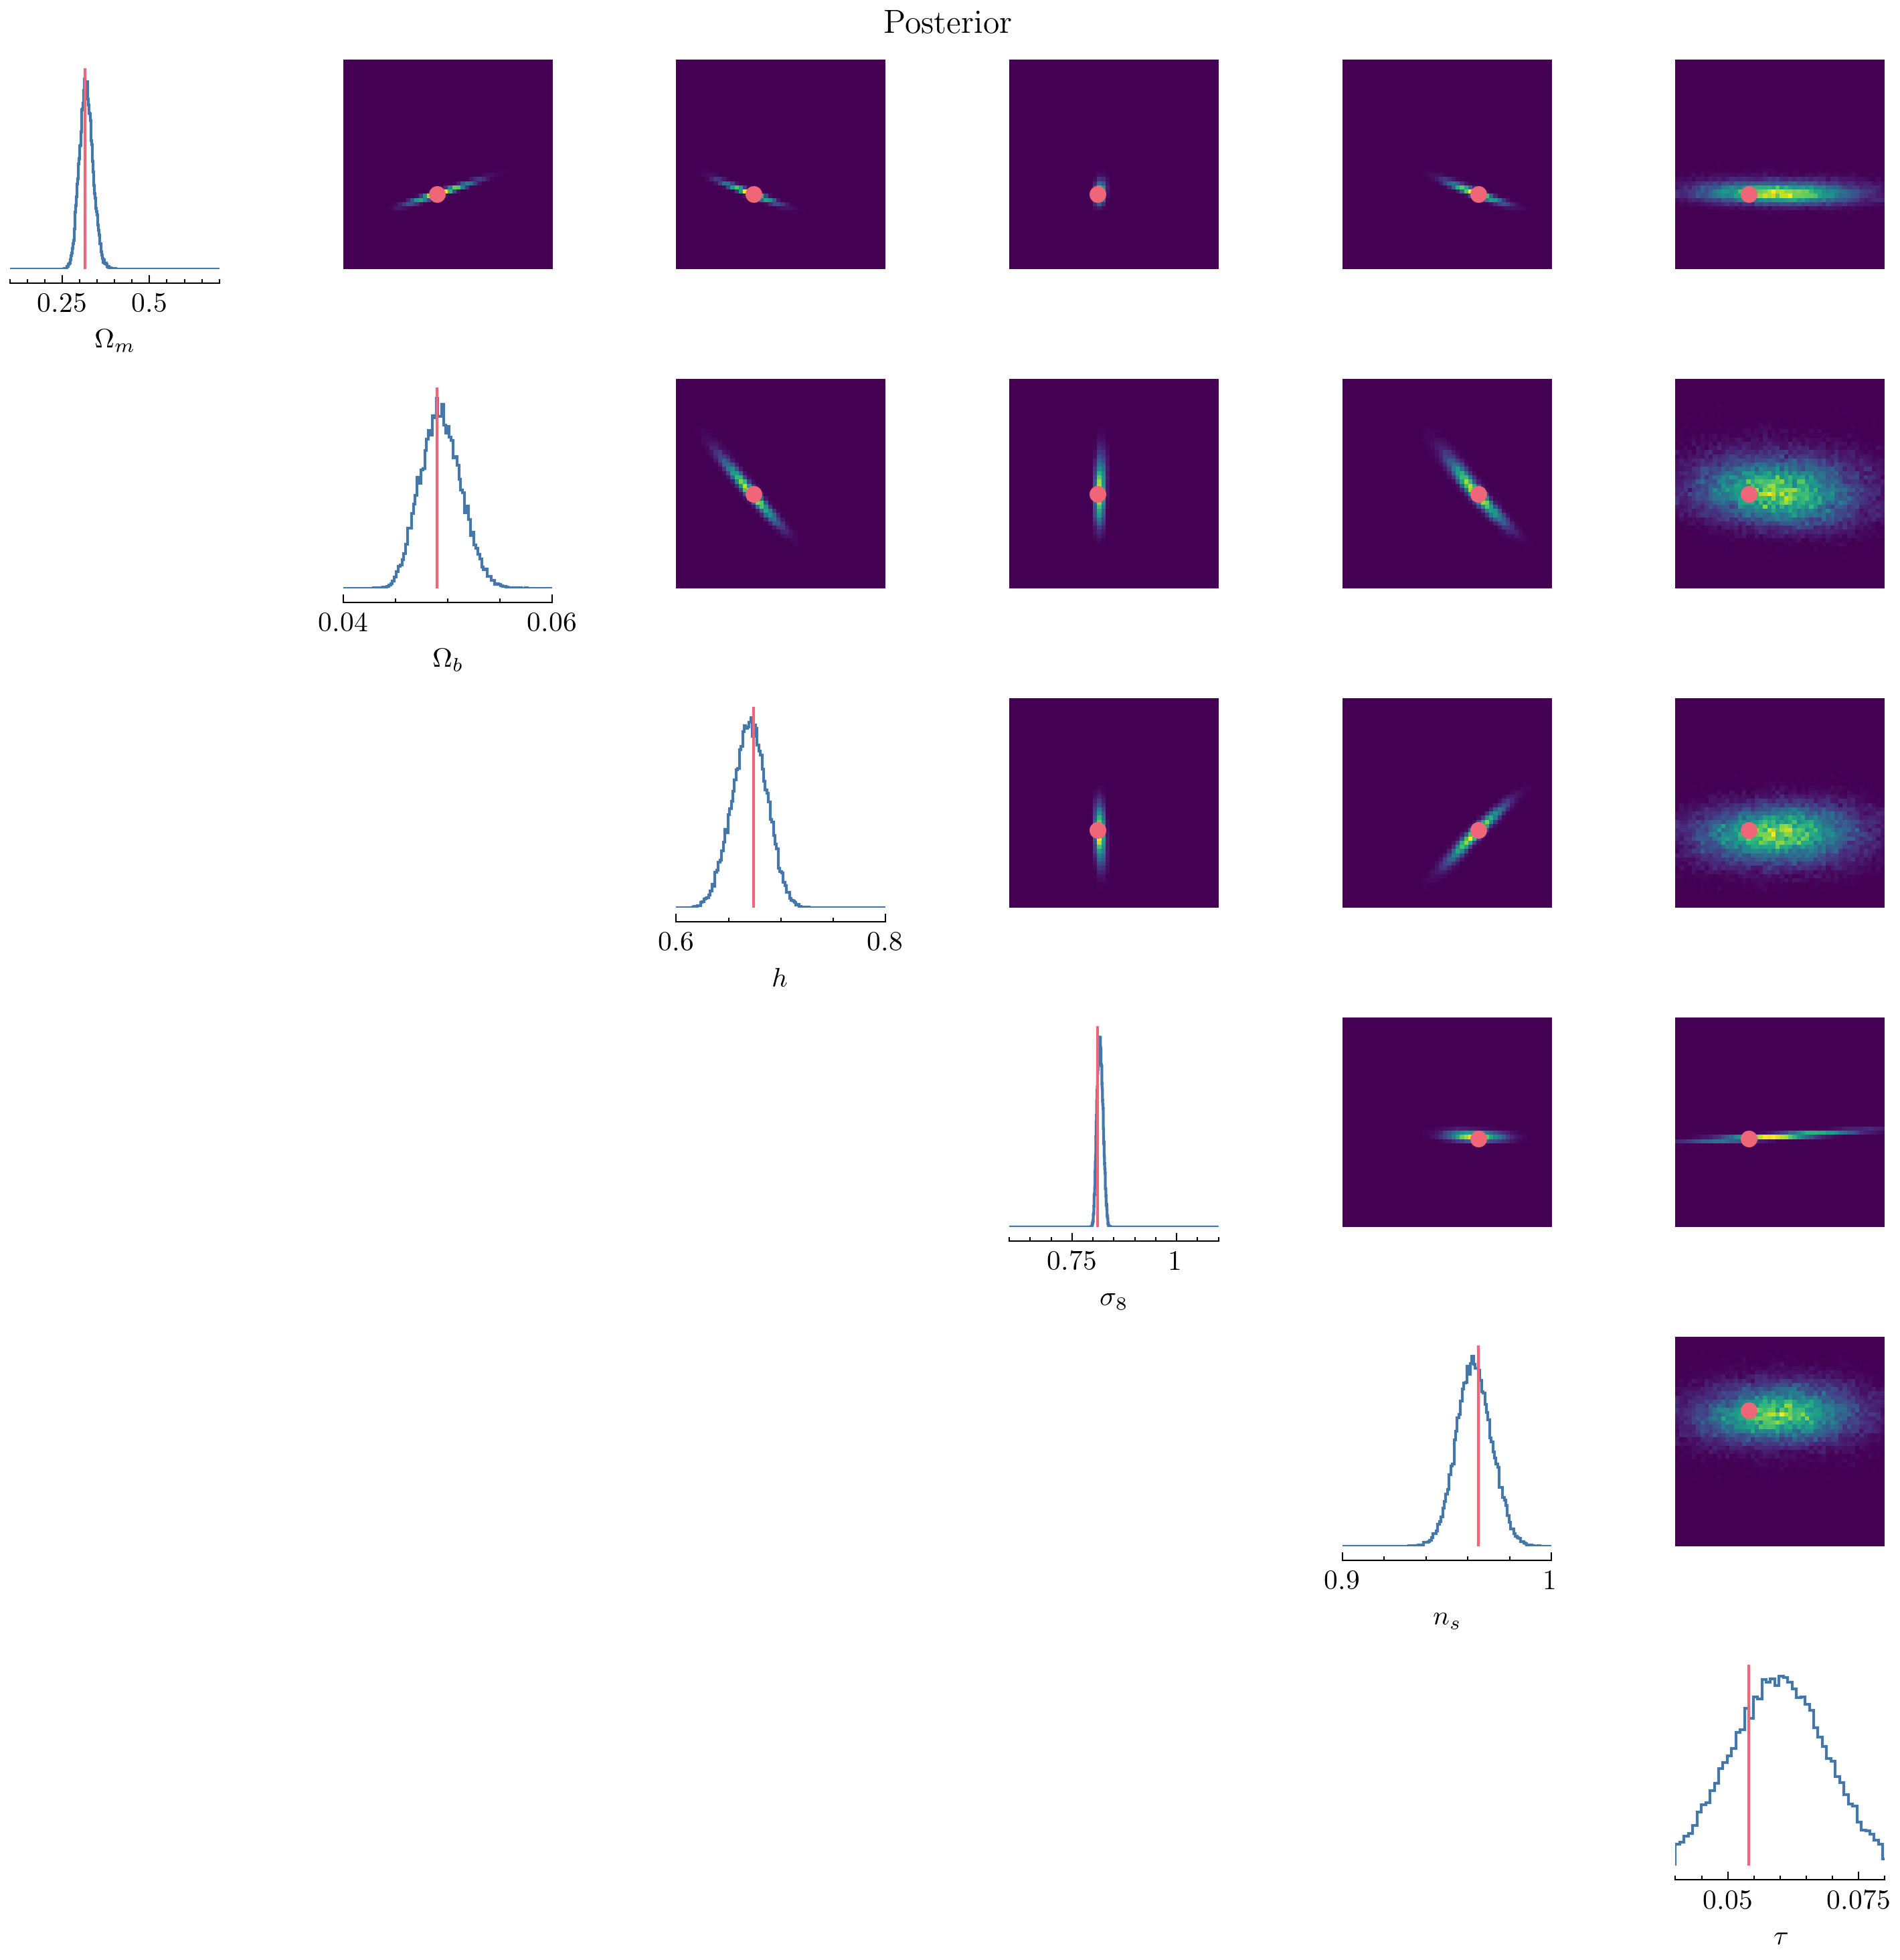

In [6]:
from sbi.analysis import pairplot

# --- LÍMITES DEL PRIOR ---
limits = torch.tensor([
    [0.1, 0.7],    
    [0.04, 0.06],  
    [0.6, 0.8],   
    [0.6, 1.1],    
    [0.9, 1.0],    
    [0.04, 0.08],  
])

param_names = [r'$\Omega_m$', r'$\Omega_b$', r'$h$', r'$\sigma_8$', r'$n_s$', r'$\tau$']

fig = pairplot(
    samples,
    points=true_parameter,
    figsize=(10, 10),
    limits=limits,
    labels=param_names
)

plt.suptitle('Posterior')
plt.tight_layout()
plt.show()

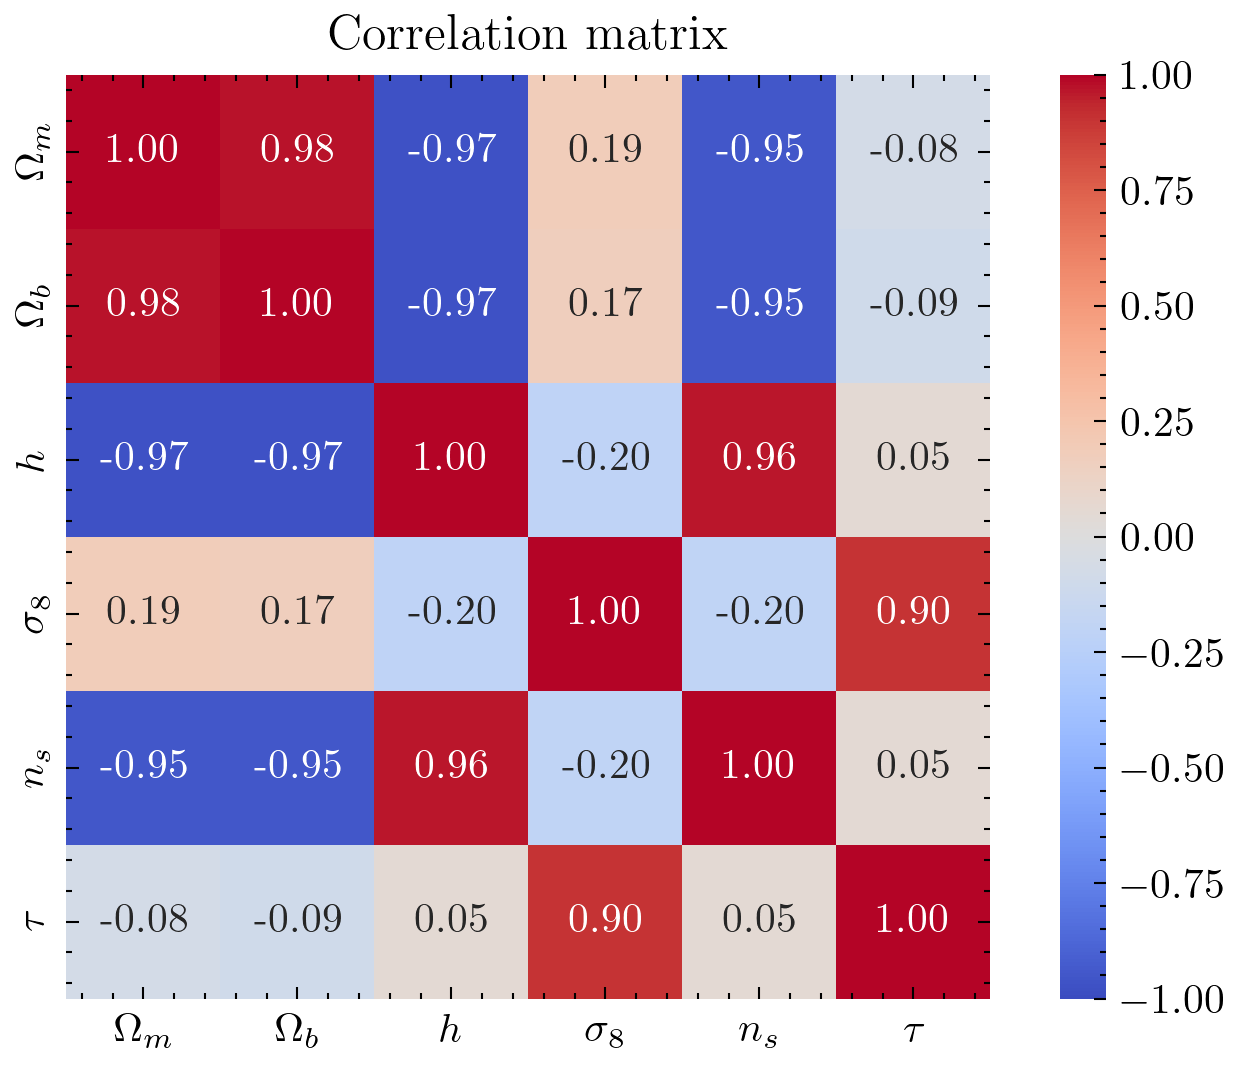

In [7]:
samples_np = samples.numpy()  
correlation_matrix = np.corrcoef(samples_np.T)  

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, xticklabels=param_names, yticklabels=param_names, vmin=-1, vmax=1)
plt.title("Correlation matrix")
plt.show()

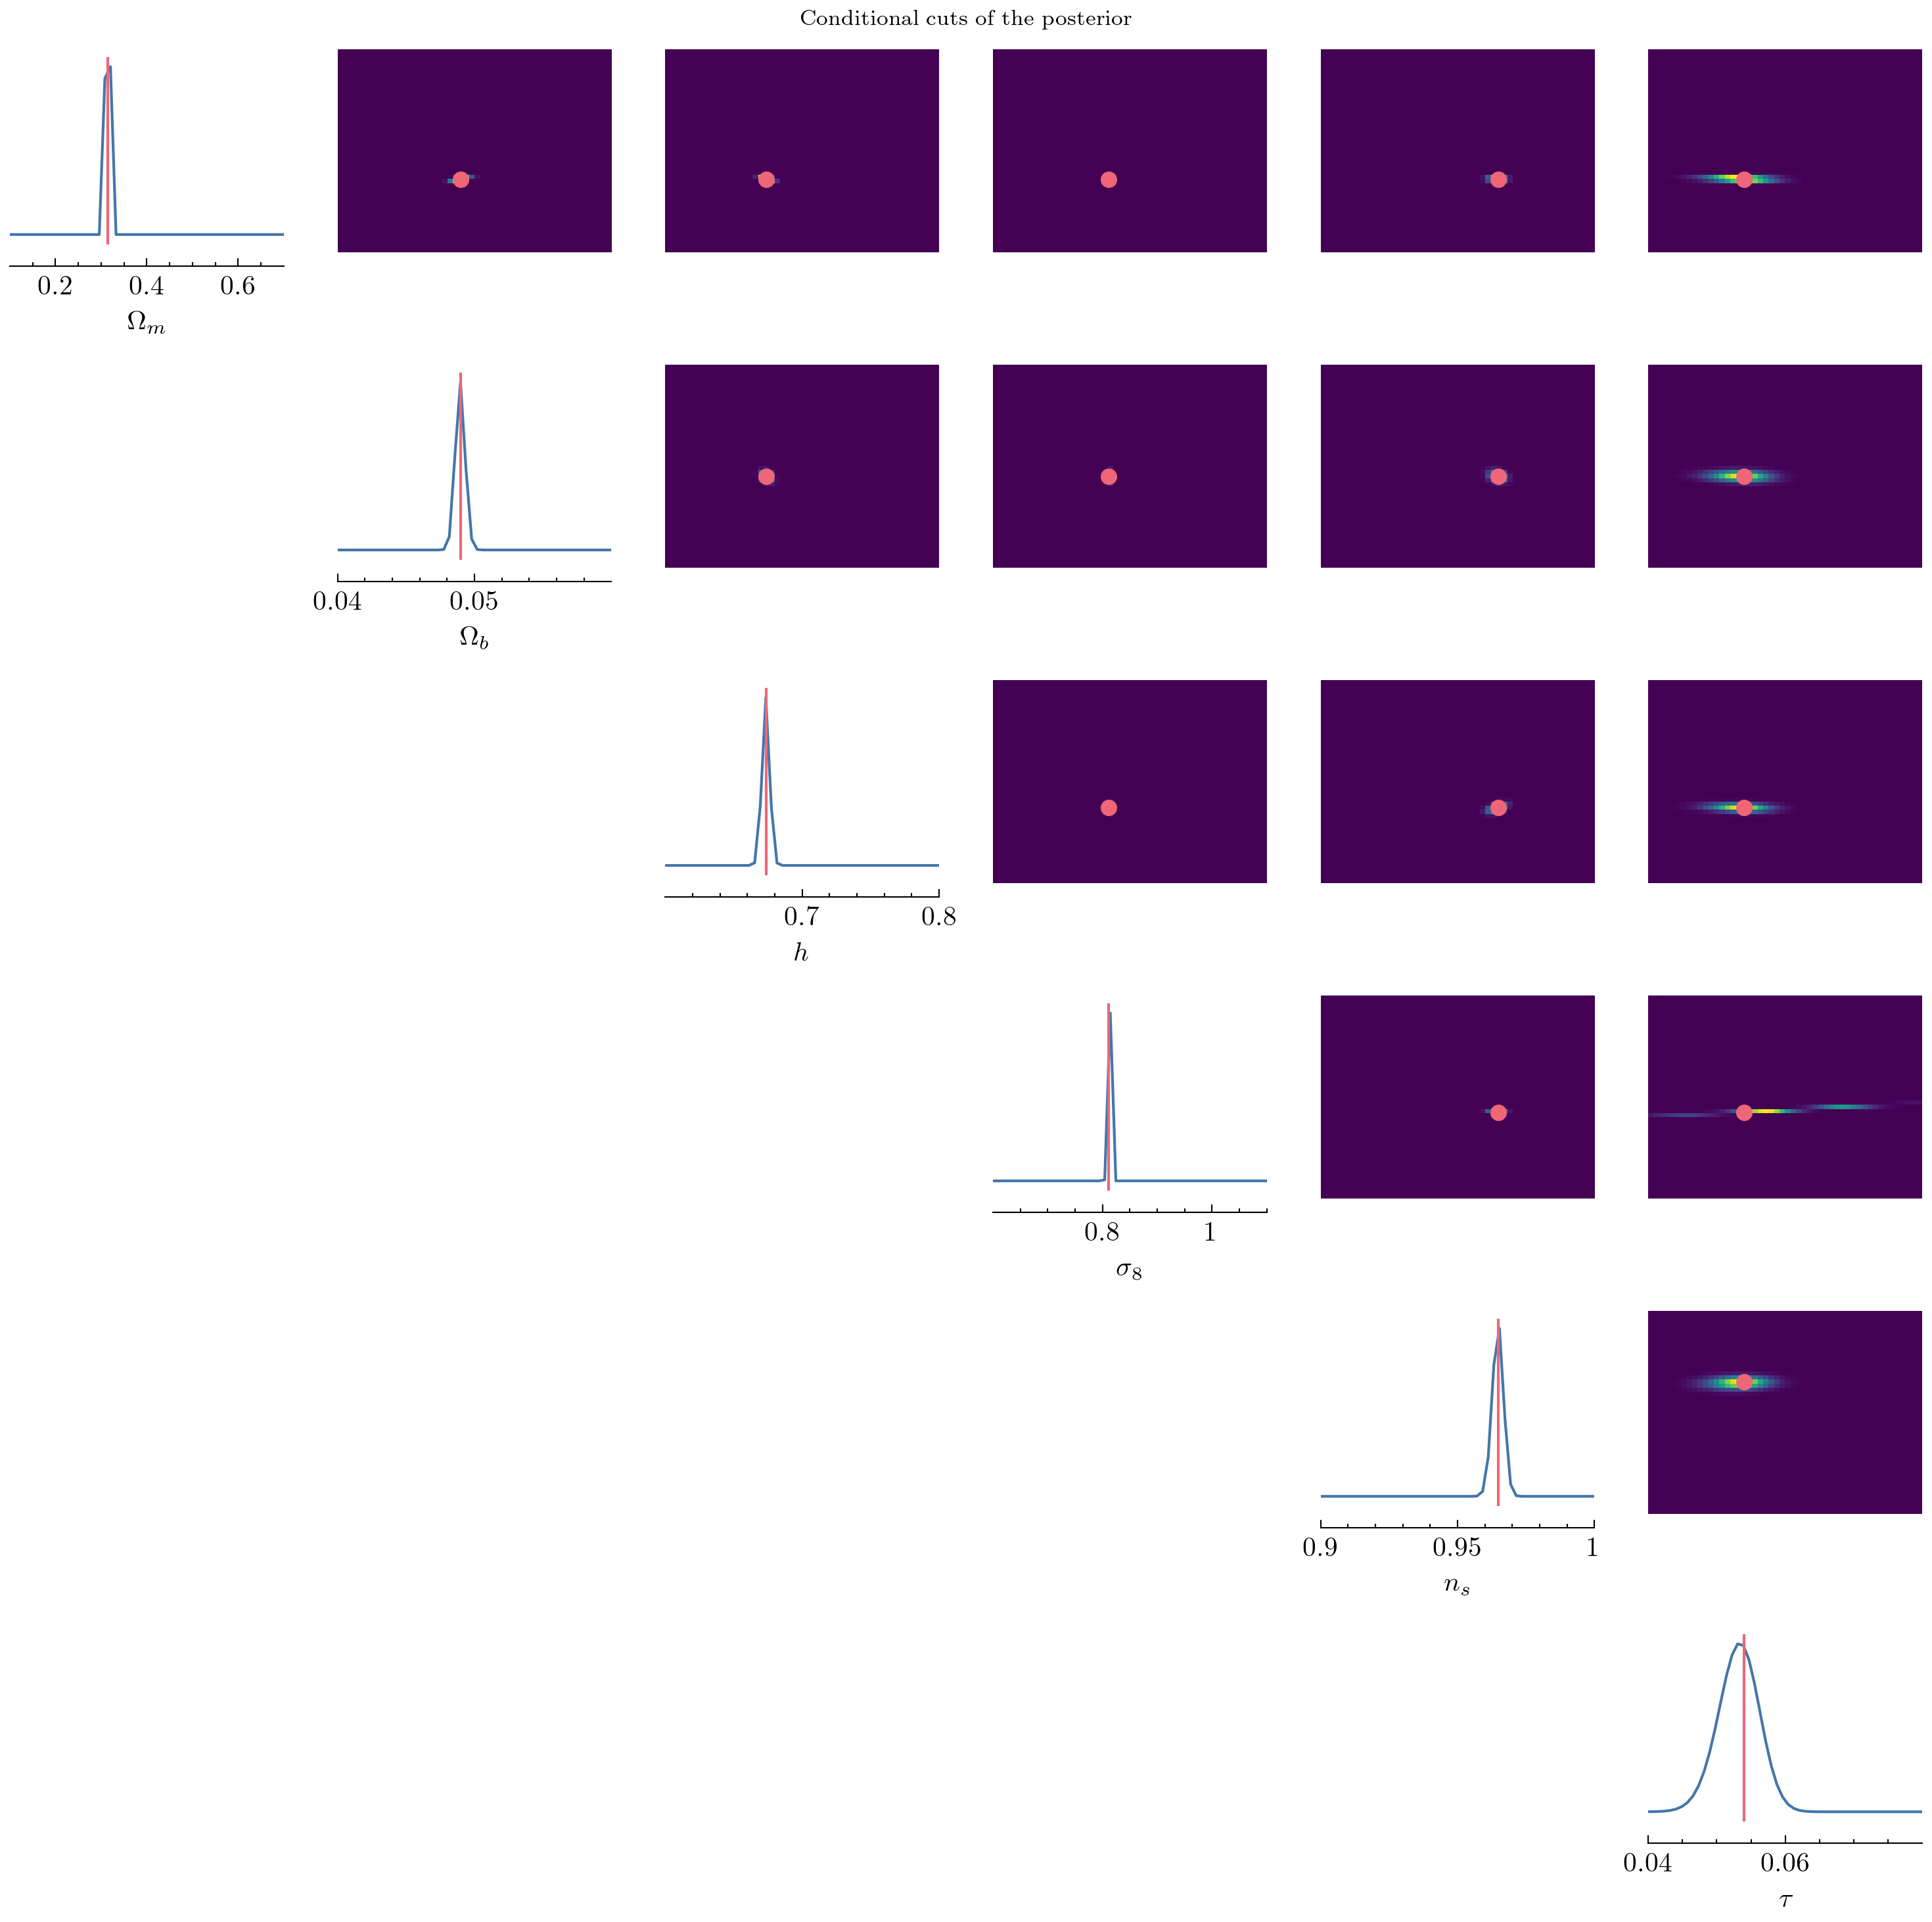

In [8]:
from sbi.analysis import conditional_pairplot

condition = true_parameter

_ = conditional_pairplot(
    density=posterior,
    condition=condition,
    limits=limits,
    figsize=(10, 10),
    labels=param_names,
    points=true_parameter
)
plt.suptitle("Conditional cuts of the posterior", fontsize=8)
plt.tight_layout()
plt.show()

In [12]:
import os
from src.inference.utils import load_model

density_estimator = load_model(os.path.join("..", "results", "inference", "trained_model_7.pkl")) # 15000 sims

In [13]:
from sbi.inference import SNPE_C

inference = SNPE_C(prior=prior)
posterior = inference.build_posterior(density_estimator)
print(posterior)

Posterior p(θ|x) of type DirectPosterior. It samples the posterior network and rejects samples that
            lie outside of the prior bounds.


In [18]:
true_parameter = torch.tensor([[0.315, 0.049, 0.674, 0.811, 0.965, 0.054]])
x_observed = simulator(true_parameter)

torch.manual_seed(42)
samples = posterior.set_default_x(x_observed).sample((75000,))

Simulación 1/1 - Parámetros: [0.315 0.049 0.674 0.811 0.965 0.054]


Drawing 75000 posterior samples: 76056it [00:04, 17237.04it/s]


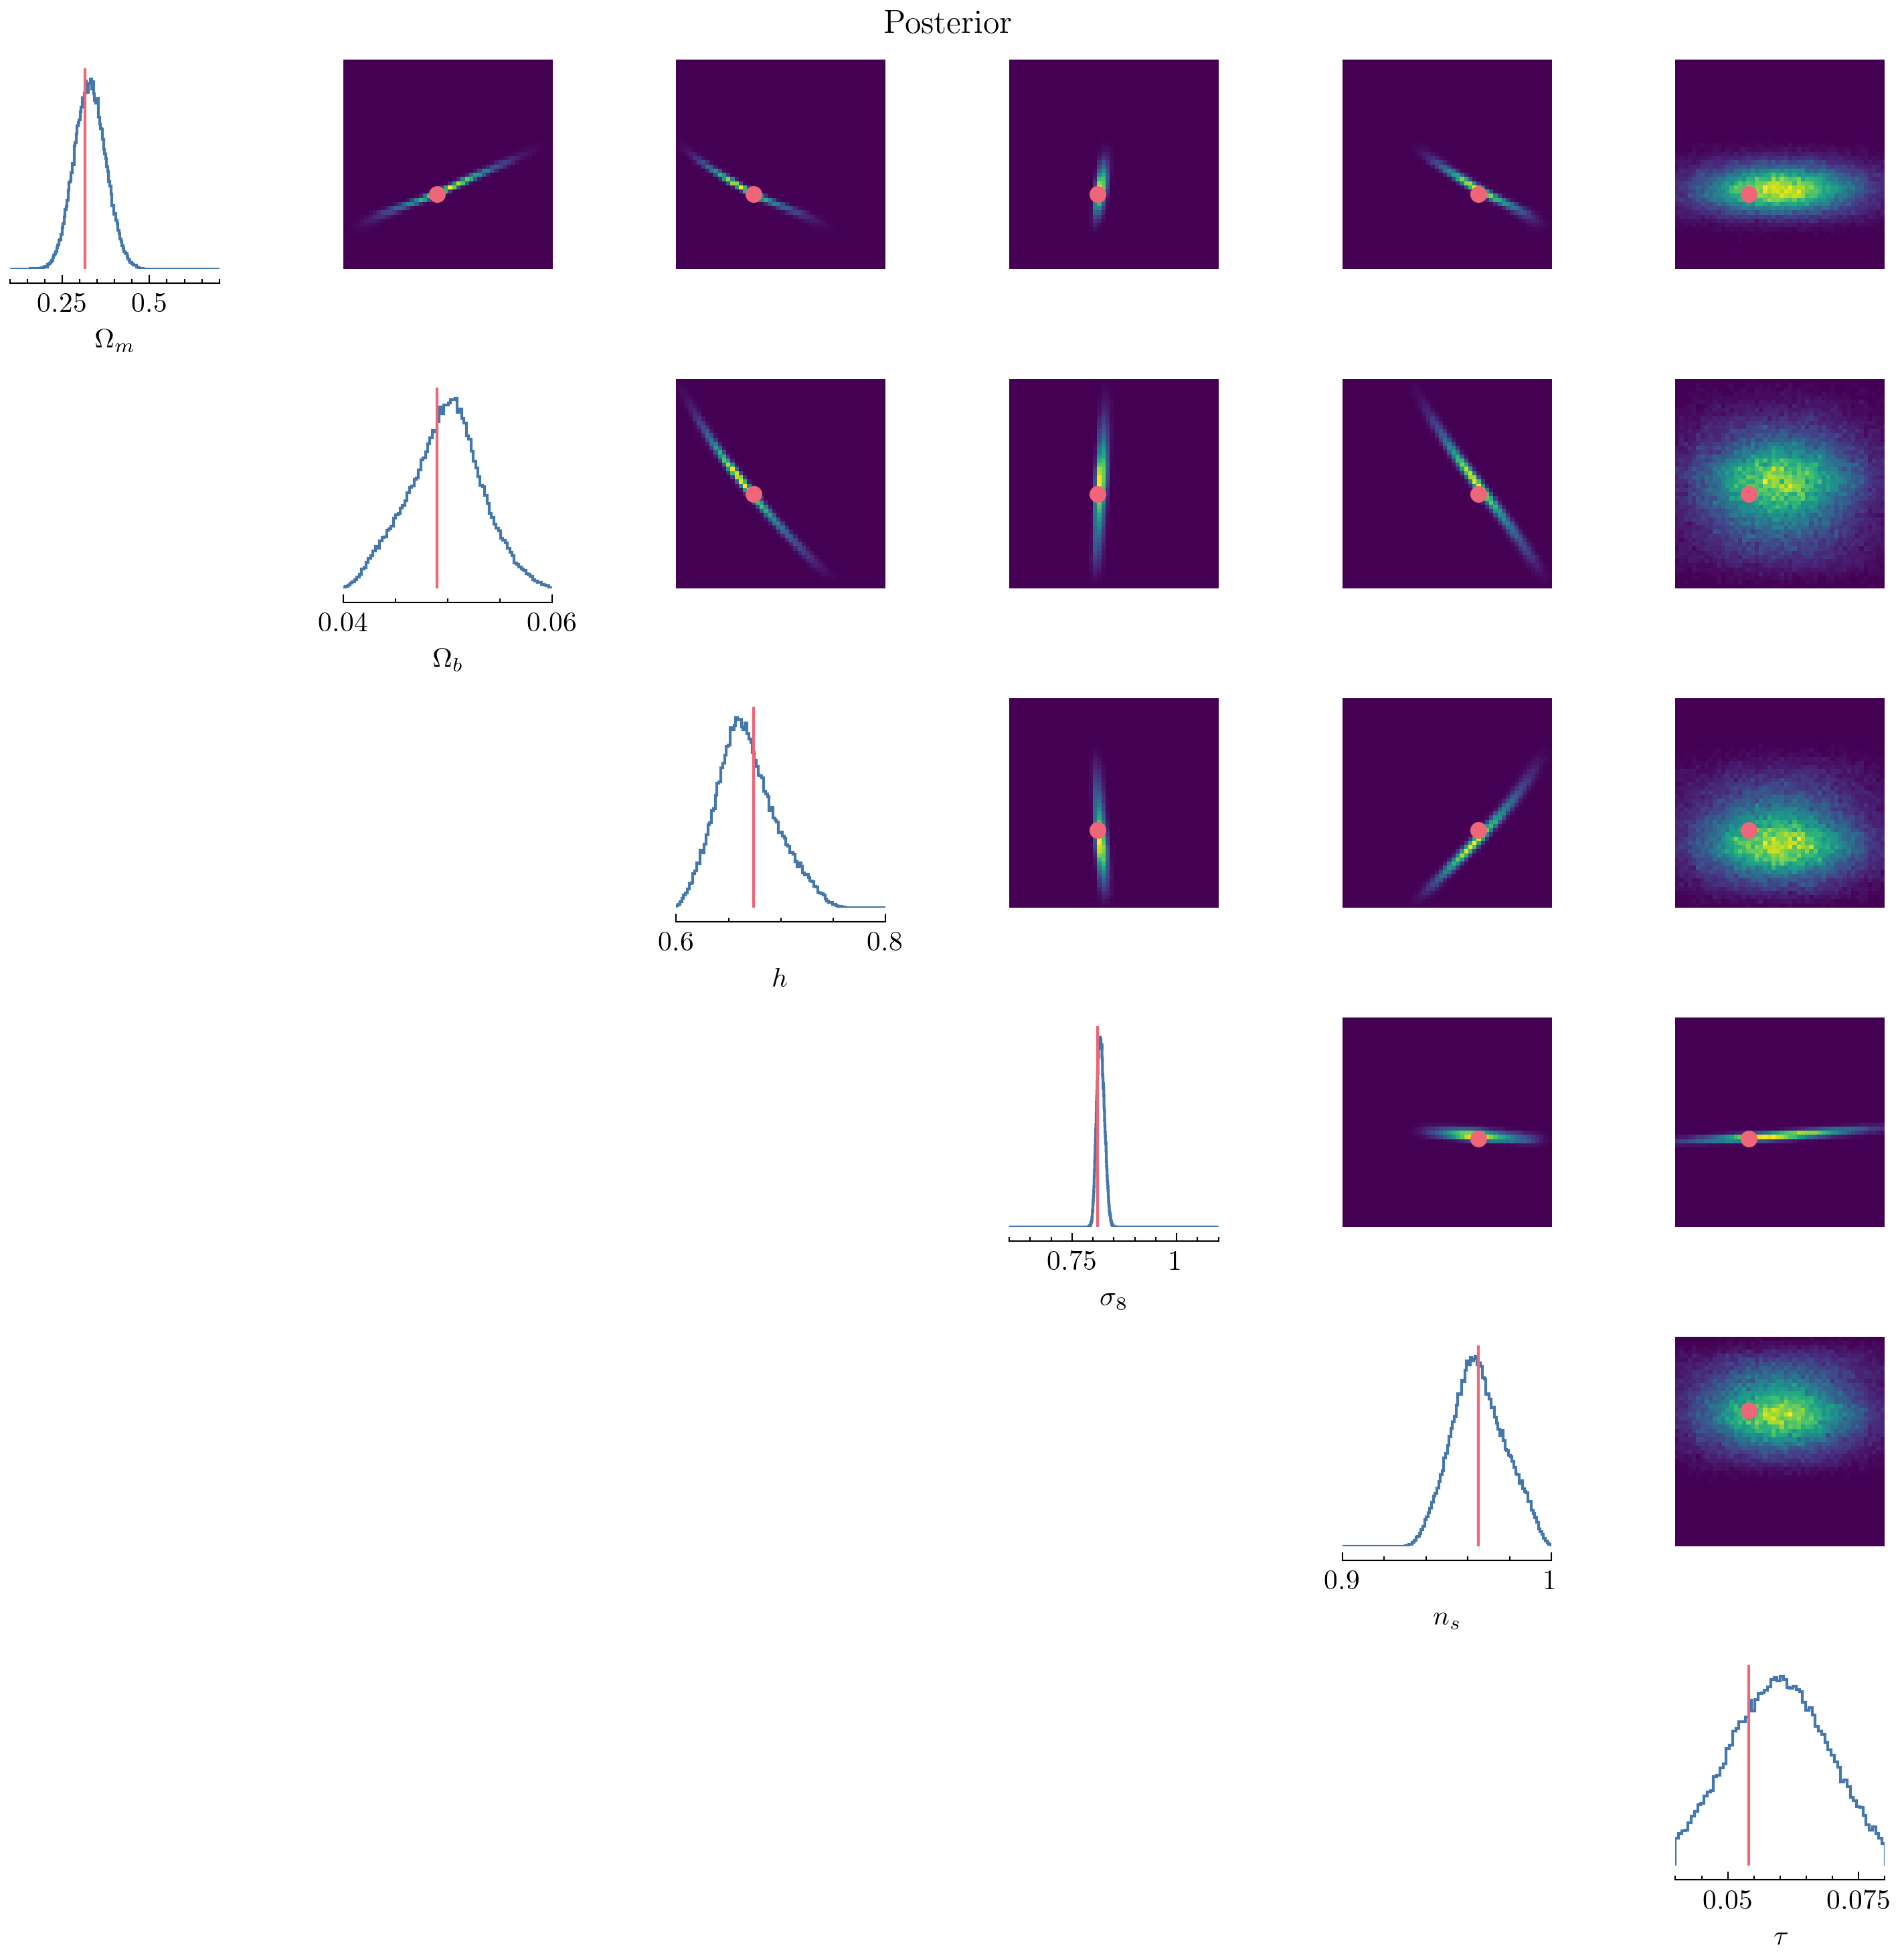

In [19]:
from sbi.analysis import pairplot

# --- LÍMITES DEL PRIOR ---
limits = torch.tensor([
    [0.1, 0.7],    
    [0.04, 0.06],  
    [0.6, 0.8],   
    [0.6, 1.1],    
    [0.9, 1.0],    
    [0.04, 0.08],  
])

param_names = [r'$\Omega_m$', r'$\Omega_b$', r'$h$', r'$\sigma_8$', r'$n_s$', r'$\tau$']

fig = pairplot(
    samples,
    points=true_parameter,
    figsize=(10, 10),
    limits=limits,
    labels=param_names
)

plt.suptitle('Posterior')
plt.tight_layout()
plt.show()

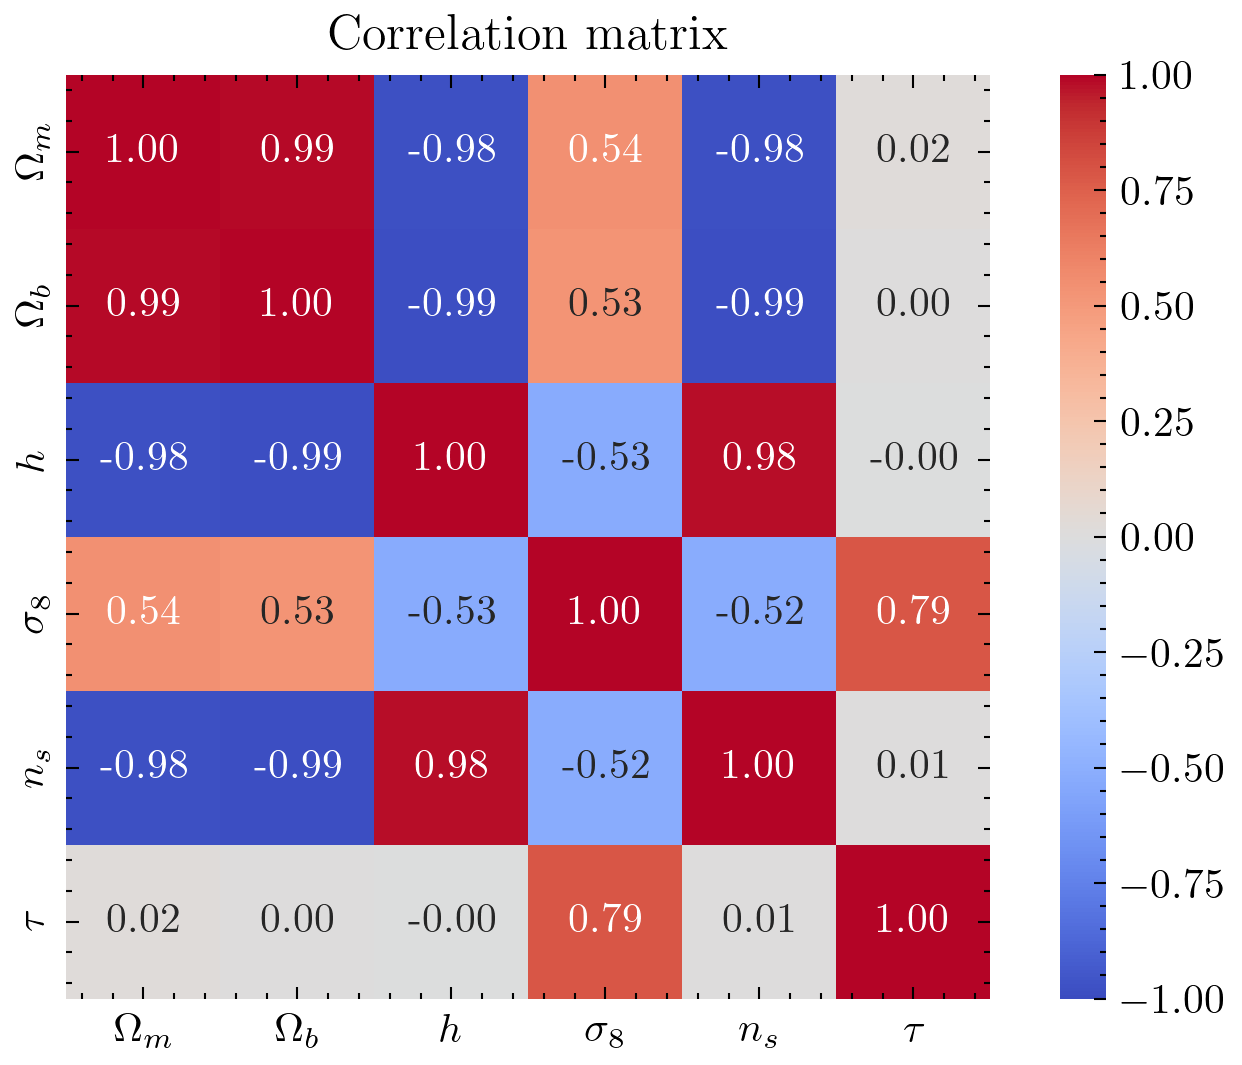

In [20]:
samples_np = samples.numpy()  
correlation_matrix = np.corrcoef(samples_np.T)  

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, xticklabels=param_names, yticklabels=param_names, vmin=-1, vmax=1)
plt.title("Correlation matrix")
plt.show()

In [37]:
from sbi.analysis.plot import sbc_rank_plot
from sbi.diagnostics import check_sbc, check_tarp, run_sbc, run_tarp

In [87]:
from src.simulation.generate_cosmologies import compute_spectrum
from src.simulation.add_noise import add_instrumental_noise, sample_observed_spectra

torch.manual_seed(4)
num_sbc_samples = 5  
thetas = prior.sample((num_sbc_samples,))
print(thetas)

# Generar espectros teóricos
theoretical_spectra = []
for i in range(num_sbc_samples):
    theoretical_spectra.append(compute_spectrum(thetas[i]))
theoretical_spectra = np.array(theoretical_spectra)
print("Espectros teóricos:", theoretical_spectra)

tensor([[0.4358, 0.0512, 0.6183, 0.7050, 0.9007, 0.0416],
        [0.6957, 0.0583, 0.7237, 1.0872, 0.9319, 0.0486],
        [0.6558, 0.0495, 0.7190, 0.9978, 0.9763, 0.0485],
        [0.2840, 0.0408, 0.7044, 0.7604, 0.9607, 0.0609],
        [0.6558, 0.0509, 0.7501, 0.9289, 0.9944, 0.0517]])
Espectros teóricos: [[   0.            0.          895.26004404 ...   59.4731921
    59.3019049    59.1300968 ]
 [   0.            0.         1576.23018022 ...  148.76181874
   148.55796065  148.35333443]
 [   0.            0.         1078.22267592 ...  116.97704804
   116.79968318  116.62140316]
 [   0.            0.          944.58873126 ...   75.04269447
    74.82668407   74.60973494]
 [   0.            0.          855.59681369 ...  104.40849892
   104.25024066  104.09078821]]


In [88]:
# Añadir ruido instrumental
noisy_spectra = add_instrumental_noise(theoretical_spectra)
print("Espectros con ruido instrumental:", noisy_spectra)

Espectros con ruido instrumental: [[2.30366924e-03 2.30367099e-03 8.95262348e+02 ... 5.94938709e+01
  5.93226216e+01 5.91508514e+01]
 [2.30366924e-03 2.30367099e-03 1.57623248e+03 ... 1.48782498e+02
  1.48578677e+02 1.48374089e+02]
 [2.30366924e-03 2.30367099e-03 1.07822498e+03 ... 1.16997727e+02
  1.16820400e+02 1.16642158e+02]
 [2.30366924e-03 2.30367099e-03 9.44591035e+02 ... 7.50633732e+01
  7.48474007e+01 7.46304896e+01]
 [2.30366924e-03 2.30367099e-03 8.55599117e+02 ... 1.04429178e+02
  1.04270957e+02 1.04111543e+02]]


In [89]:
# Muestrear espectros observados
observed_spectra = sample_observed_spectra(noisy_spectra)
print("Espectros observados muestreados:", observed_spectra)

Espectros observados muestreados: [[  0.           0.         229.21416286 ...  61.15145834  59.27281891
   61.81897733]
 [  0.           0.         204.63349257 ... 150.89029542 150.41478987
  151.039553  ]
 [  0.           0.         318.02500554 ... 120.15471996 116.08924407
  114.95106969]
 [  0.           0.         134.82421719 ...  75.26273904  74.24988736
   73.64736611]
 [  0.           0.         865.38684922 ... 107.51950542 105.43022974
  105.99793792]]


In [90]:
from src.inference.utils import preprocess_spectra

pre_spectra = preprocess_spectra(observed_spectra)
print("Espectros preprocesados:", pre_spectra)

Espectros preprocesados: tensor([[  0.0000,   0.0000, 229.2142,  ...,  61.1515,  59.2728,  61.8190],
        [  0.0000,   0.0000, 204.6335,  ..., 150.8903, 150.4148, 151.0396],
        [  0.0000,   0.0000, 318.0250,  ..., 120.1547, 116.0892, 114.9511],
        [  0.0000,   0.0000, 134.8242,  ...,  75.2627,  74.2499,  73.6474],
        [  0.0000,   0.0000, 865.3868,  ..., 107.5195, 105.4302, 105.9979]])


In [94]:
from src.inference.simulator import create_simulator

simulator = create_simulator()
torch.manual_seed(4)

xs = simulator(thetas)
print(xs)

Simulación 1/5 - Parámetros: [0.43578315 0.05118185 0.6182914  0.7050016  0.90071946 0.04155847]
Simulación 2/5 - Parámetros: [0.69573677 0.05826226 0.72371584 1.0871943  0.9318912  0.04859313]
Simulación 3/5 - Parámetros: [0.65575624 0.04947034 0.7189892  0.9977907  0.97634846 0.04854811]
Simulación 4/5 - Parámetros: [0.28397894 0.04077107 0.70440584 0.7603712  0.9607378  0.06093048]
Simulación 5/5 - Parámetros: [0.65576094 0.05086127 0.7501145  0.92888796 0.99436146 0.05168584]
tensor([[   0.0000,    0.0000,  707.4004,  ...,   62.3684,   58.2519,
           62.6828],
        [   0.0000,    0.0000, 3553.5540,  ...,  146.5107,  144.4888,
          145.6360],
        [   0.0000,    0.0000,       nan,  ...,       nan,       nan,
               nan],
        [   0.0000,    0.0000,       nan,  ...,       nan,       nan,
               nan],
        [   0.0000,    0.0000,       nan,  ...,       nan,       nan,
               nan]])


In [52]:
# run SBC: for each inference we draw 1000 posterior samples.
num_posterior_samples = 1_000
num_workers = 1
ranks, dap_samples = run_sbc(
    thetas, xs, posterior, num_posterior_samples=num_posterior_samples, num_workers=num_workers
)

AttributeError: 'list' object has no attribute 'shape'

In [53]:
check_stats = check_sbc(
    ranks, thetas, dap_samples, num_posterior_samples=num_posterior_samples
)

C:\Users\Julian\AppData\Local\Temp\ipykernel_8104\2079634748.py:1: UserWarning: You are computing SBC checks with less than 100 samples. These checks should be based on a large number of test samples theta_o, x_o. We recommend using at least 100.
  check_stats = check_sbc(


AssertionError: 

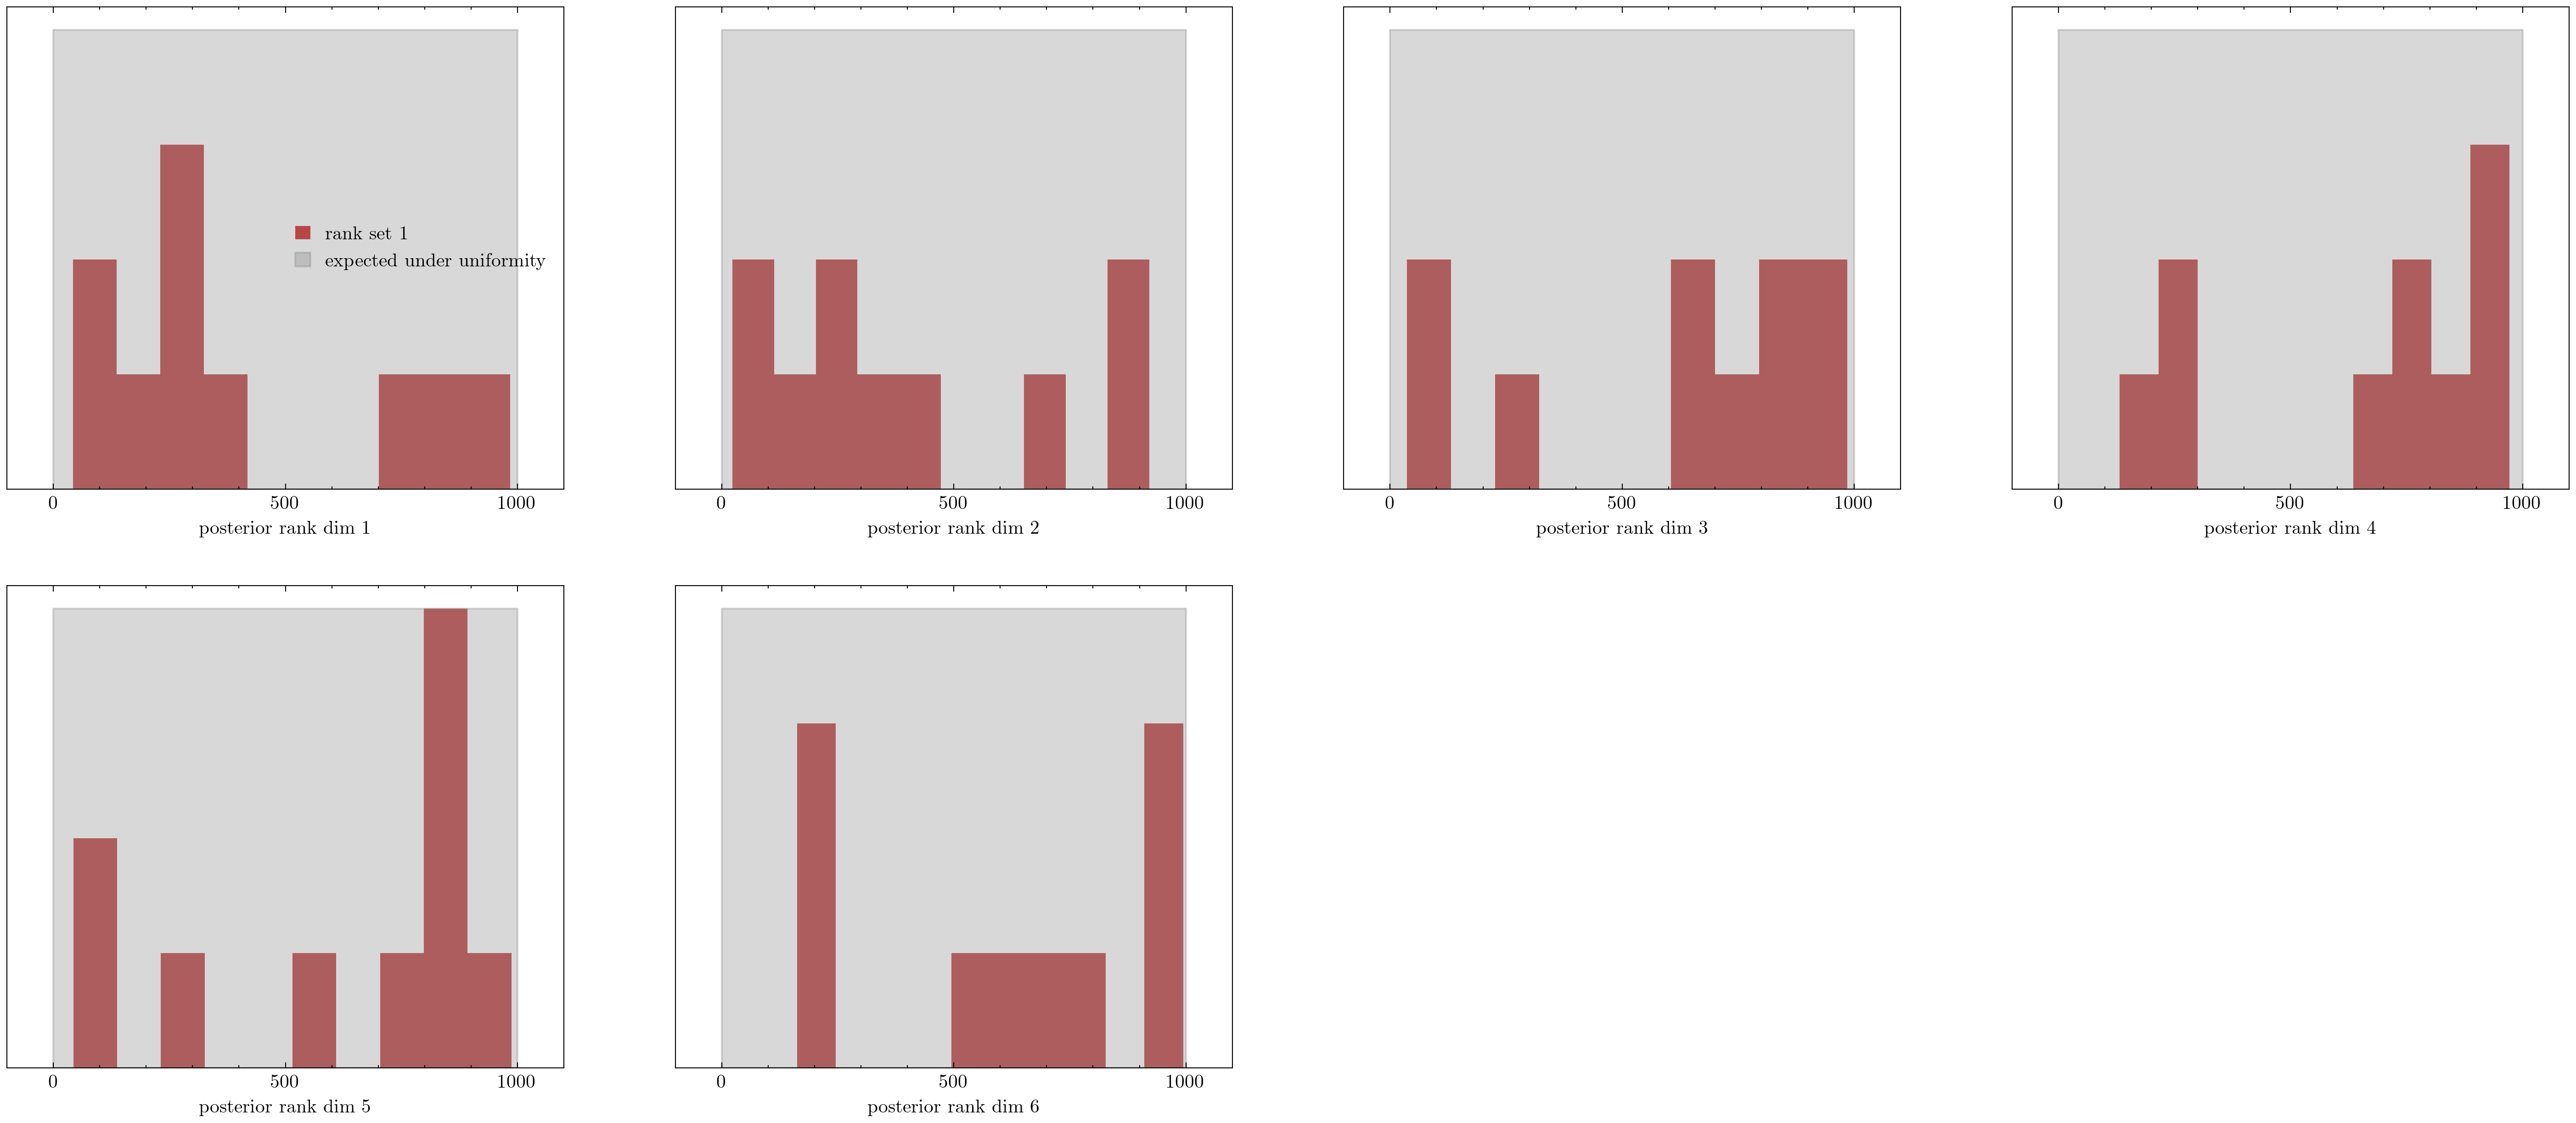

In [30]:
f, ax = sbc_rank_plot(
    ranks=ranks,
    num_posterior_samples=num_posterior_samples,
    plot_type="hist",
    num_bins=10,  # by passing None we use a heuristic for the number of bins.
)